In [2]:
from IPython.display import Image
import warnings
warnings.filterwarnings(action='ignore')

#### [머신러닝의 학습 방법들]
1. Gradient descent based learning - 중요
2. Probability theory based learning
3. Information theory based learning
4. Distance similarity based learning

### [Gradient descent based learning]
- 실제 값과 학습된 모델 예측치의 오차를 최소화
- 모델의 최적 parameter 찾기가 목적.! 
- gradient descent(일종의 알고리즘) 활용

- #### 오차의 합
> ### $(\hat{y}^{(1)} - y^{(1)}) + (\hat{y}^{(2)} - y^{(2)})$ + $(\hat{y}^{(3)} - y^{(3)})$ + $(\hat{y}^{(4)} - y^{(4)})$
> #### 오차는 양수 또는 음수 가능 -> 상쇄될 수 있음
> ### $(\hat{y}^{(1)} - y^{(1)})^2 + (\hat{y}^{(2)} - y^{(2)})^2$ + $(\hat{y}^{(3)} - y^{(3)})^2$ + $(\hat{y}^{(4)} - y^{(4)})^2$
> #### 따라서 제곱의 합으로 변환
> #### 따라서 Squared Error를 최소화 할 수 있는 weight값을 찾자

###### 

- #### 식으로 정리
> ### $\sum_{i=1}^n(w_1x^{(i)} + w_0 \times 1 - y^{(i)})^2 $
> #### -> $\hat{y}$과 $y$의 차이를 최소화
> #### 최소 또는 최대의 문제 -> 미분으로 해결하자
> #### 찾고자 하는 값 : $w_1, w_0$
> #### 따라서, 위 식을 w1과 w0에 의한 편미분을 통해 최소값을 찾아낸다.

- #### 가설함수
> ### $f(x) = h_\theta(x)$
> #### 앞으로 우리는 이 예측함수를 가설함수라고 부르자
> #### * $h_\theta(x) = ax + b = \hat{y}$

- #### Cost Function
> ### $J(w_0, w_1) = \frac{1}{2m}	\sum_{i=1}^m (h_\theta (x^{(i)}) - y^{(i)})^2$
> #### -> 실제값과 가설함수의 차이, Cost Function이라고 부를 예정
> ##### *costfunction 앞에 $\frac{1}{2m}$이 있는이유 : 나중에 미분해줄 때 약분되서 계산 용이하게 하려고

- #### Cost Function에서 구하는것
> ### $\argmin_\theta \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2$
> ##### cost function의 최소화를 위한 weight값
> ##### 우리는 저 $\theta$를 찾는게 목적

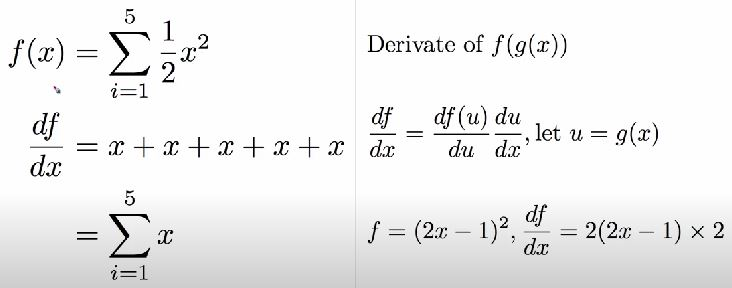

In [3]:
Image("C:/Users/hyun/workspace/TIL/ML/0_references/images/6_시그마와체인룰.JPG")

###### [참고]
###### 왼쪽내용 : 미분할 때 시그마 신경안써도 된다.
###### 오른쪽 내용 : 체인룰, 합성함수 미분이랑 똑같음

- #### Cost Function을 $w_0,w_1$로 편미분하기
> ### $J(w_0,w_1) = \frac{1}{2m} \sum_{i=1}^m(w_1x^{(i)} + w_0 - y^{(i)})^2$
> ### $\frac{\partial J}{\partial w_0} = \frac{1}{m}\sum_{i=1}^m(w_1x^{(i)} + w_0 -y^{(i)})$
> ### $\frac{\partial J}{\partial w_1} = \frac{1}{m}\sum_{i=1}^m(w_1x^{(i)} + w_0 -y^{(i)})x^{(i)}$

##### *컴퓨터가 weights의 최적값을 찾는 방법*
- 연립방정식 풀기(normal equation)
- gradient descent

### [Normal equation]
- Cost Function을 최소화하는 방법
#### $\argmin_\theta \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2$
- 저 식을 최소화 하는 $\theta$값을 찾아라!

- #### $w_0, w_1$을 찾자
> #### $J = \frac{1}{2} \sum_{i=1}^m(w_1x^{(i)} + w_0 - y^{(i)})^2$
> #### $\frac{\partial J}{\partial w_0} = \sum_{i=1}^m(w_1x^{(i)} + w_0 -y^{(i)}) = 0$
> #### $\frac{\partial J}{\partial w_1} = \sum_{i=1}^m(w_1x^{(i)} + w_0 -y^{(i)})x^{(i)} = 0$

- #### 위의 두 식을 아래와 같이 정리
> #### $\hat{w}_0m + \hat{w}_1 \sum_{} x^{(i)} = \sum_{}y^{(i)}$
> #### $\hat{w}_0\sum_{} x^{(i)} + \hat{w}_1 \sum_{} (x^{(i)})^2 = \sum_{}y^{(i)}x^{(i)}$

- ##### $\hat{w}$을 구할수 있도록 식 전개
> #### $X = \begin{bmatrix}1 & x^{(1)} \\1 & x^{(2)} \\1 & x^{(3)} \\\vdots\end{bmatrix}$, $w = \begin{bmatrix}w_0 \\w_1\end{bmatrix}$ , $y = \begin{bmatrix}y^{(1)} \\y^{(2)} \\y^{(3)} \\\vdots\end{bmatrix}$ 이면
> - #### $X^TX = \begin{bmatrix}m & \sum_{} x^{(i)} \\\sum_{} x^{(i)} & \sum_{} (x^{(i)})^2\end{bmatrix}$이고
> - #### $(X^TX)\hat{w} = X^Ty$ 이라서
> - #### 최종적으로, $\hat{w} = (X^TX)^{-1}X^Ty$ 인 $\hat{w}$을 구해주면 된다.

> #### $(X^TX)^{-1} = \frac{1}{m\sum{} (x^{(i)} - \bar{x})^2} \begin{bmatrix} \sum_{} (x^{(i)})^2 & -m\bar{x} \\-m\bar{x} & m\end{bmatrix}$
> #### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; = $\frac{1}{\sum{} (x^{(i)} - \bar{x})^2} \begin{bmatrix} \sum_{} (x^{(i)})^2/m & -\bar{x} \\-\bar{x} & 1\end{bmatrix}$
> #### 위의 내용에 따라 $X^Ty = \begin{bmatrix} \sum{}y^{(i)} \\ \sum{}x^{(i)}y{(i)} \end{bmatrix}$

> #### $\hat{w} = (X^TX)^{-1}X^Ty = \begin{bmatrix} \hat{w_0} \\ \hat{w_1} \end{bmatrix}$
> ##### 따라서 !!!
> - #### $\hat{w_1} = \frac{\sum{} x^{(i)}y^{(i)} - m \bar{x} \bar{y}}{\sum{} (x^{(i)} - \bar{x})^2}$
> - #### $\hat{w_0} = \bar{y} - \hat{w_1}\bar{x}$

### [Normal equation] 특징
- $X^TX$의 역행렬이 존재할 때 사용
- Iteration 등 사용자 지정 parameter가 없음 (GD같은 경우는 사용자가 parameter 지정해줘야함)

### [Gradient Descent] - 경사하강법
- 특정 위치에서 기울기(경사)를 구해서 weight를 점차 업데이트 해나가는 기법
#### [learning rate = $\alpha$] : 보폭을 얼마나 크게할지
- #### $\alpha$가 너무 작을경우 : 끝까지 못감, 시간이 오래걸림


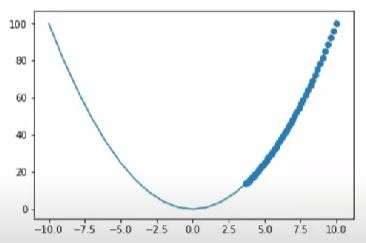

In [4]:
Image("C:/Users/hyun/workspace/TIL/ML/0_references/images/6_알파가너무작을때.JPG")

- #### $\alpha$가 너무 클경우 : 데이터가 튐, 수렴하지 못함

- 굴곡이 많은 함수의 경우는 ? -> SGD등으로 대처 (이후 강의)

In [5]:
import matplotlib.pyplot as plt
import numpy as np

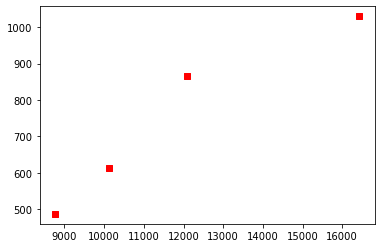

In [6]:
x_data = np.array([8759, 10132, 12078, 16430])
y_data = np.array([487, 612, 866, 1030])

plt.scatter(x_data, y_data, color='r', marker="s")
plt.show()

In [7]:
weight_0 = np.random.sample(5)
weight_1 = np.random.sample(5)
weight_0, weight_1

(array([0.38973539, 0.53091504, 0.98869312, 0.76683305, 0.60156547]),
 array([0.45326223, 0.42360666, 0.19154043, 0.33614231, 0.68546963]))

In [8]:
y_hat_list = []
for w0, w1 in zip(weight_0, weight_1):
    y_hat_list.append(w0 + w1*x_data)

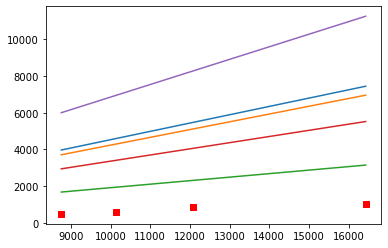

In [9]:
plt.scatter(x_data, y_data, color='r', marker='s')
for y_hat in y_hat_list:
    plt.plot(x_data, y_hat)

plt.show()

#### 따라서, 결국 **GD알고리즘의 핵심 = parameter의 업데이트**
### [Linear regression with GD]
- 임의의 $\theta_0, \theta_1$값으로 초기화
- Cost function $J(\theta_0, \theta_1)$이 최소화 될때까지 학습
- 더 이상 cost function이 줄어들지 않거나 학습 횟수를 초과할 때 종료

> ### $x_{new} = x_{old} - \alpha \times (2x_{old})$
> ### loop until convergence{
> ### <br> do $\theta_j:= \theta_j - \alpha\frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1)$}

- !! 중요한건 !!,  $\theta_0, \theta_1$이 simultaneously하게 업데이트 되어야한다.

##### *참고사항
 - Learning rate, Iteraion 횟수 등 Parameter 지정
 - Feature가 많으면 Normal equation에 비해 상대적으로 빠름
 - 최적값에 수렴하지 않을수도 있음

### **[Gradient Descent로 Linear Regression 구해보기]**

In [10]:
import numpy as np
import pandas as pd
df = pd.read_csv('C:/Users/hyun/workspace/TIL/ML/6_linear_reegression/slr06.csv')
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [11]:
# X를 2차원 형태로 만들어주기위해 reshape, y는 1차원으로 그냥 받음
raw_X = df["X"].values.reshape(-1,1)
y = df["Y"].values
print(y.shape)

(63,)


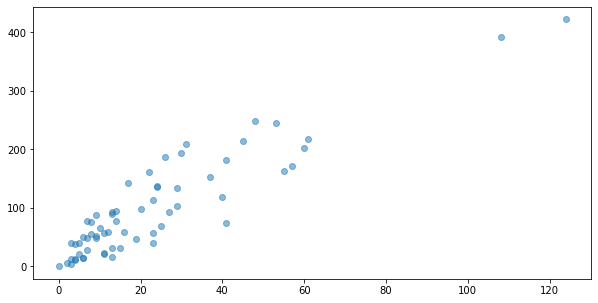

In [12]:
plt.figure(figsize=(10,5))
plt.plot(raw_X, y, 'o', alpha=0.5)

In [13]:
# raw_X는 2dimension, y는 1dimension
raw_X[:5], y[:5]

(array([[108],
        [ 19],
        [ 13],
        [124],
        [ 40]], dtype=int64),
 array([392.5,  46.2,  15.7, 422.2, 119.4]))

In [14]:
# w0만들어줄 ones 생성
np.ones((len(raw_X),1)).shape

(63, 1)

In [15]:
# 완성된 X의 모습
X = np.concatenate((np.ones((len(raw_X), 1)), raw_X), axis=1)
X[:5]


array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

In [23]:
# 이제 w값들 만들자
w = np.random.normal((2,1)) # 정규분포에서 랜덤하게 2개 뽑음, 당연히 그냥 지정해줘도됨
[w].append([1,2])


a = np.array([1,2])
b = []
b.append(a)
c = np.array([1,2])
b.append(c)
b

[array([1, 2]), array([1, 2])]

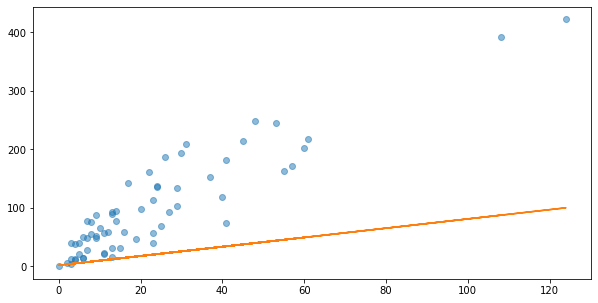

In [332]:
plt.figure(figsize=(10,5))
y_predict = np.dot(X,w) # X행렬과 w행렬을 dot product(내적)한걸 y_predict로
plt.plot(raw_X, y, "o", alpha=0.5)
plt.plot(raw_X, y_predict)

##### $f(x) = h_\theta(x)$ 부분 표현

In [333]:
def hypothesis_function(X, theta):
    return X.dot(theta) # Xw만듦

In [341]:
h = hypothesis_function(X,w)
h

array([ 87.55122062,  17.0753599 ,  12.32417828, 100.22103828,
        33.70449557,  47.16617684,  20.24281431,  13.11604188,
        37.66381359,   9.94858746,   5.98926945,  40.0394044 ,
        10.74045107,  20.24281431,   7.57299665,   3.61367864,
        21.03467792,   6.78113305,   4.40554224,  20.24281431,
         6.78113305,   9.15672386,   9.15672386,   4.40554224,
        24.99399593,   7.57299665,   5.19740584,  17.8672235 ,
         7.57299665,   5.19740584,   2.02995143,  21.82654152,
         6.78113305,   5.98926945,  19.45095071,  10.74045107,
        50.33363125,  11.53231467,   5.19740584,  14.69976909,
        12.32417828,  49.54176765,  34.49635918,  31.32890476,
        45.58244963,  34.49635918,  10.74045107,  23.41026873,
         8.36486026,   4.40554224,  15.49163269,  12.32417828,
        12.32417828,  13.90790548,   8.36486026,  24.99399593,
        25.78585954,  21.03467792,   9.15672386,  26.57772314,
        13.11604188,  43.99872242,  22.61840512])

In [159]:
# 완료된 모습
hypothesis_function(X,w)[:5]

array([11.90857699,  4.11326635,  3.58773979, 13.30998115,  5.95260931])

##### Cost Fuction : $J(w_0,w_1) = \frac{1}{2m} \sum_{i=1}^m(w_1x^{(i)} + w_0 - y^{(i)})^2$ 부분 표현
- 여기서 h-y부분의 shpae은 (63,1)의 매트릭스 형태이다.
- 제곱한 부분은 매트릭스끼리 곱한거기 때문에 각 값들끼리 자기들끼리 곱해진다

In [160]:
def cost_function(h, y):
    return (1/(2*len(y)))*np.sum((h-y)**2)

In [161]:
h = hypothesis_function(X,w)
cost_function(h, y)

7986.965427381239

### [Gradient Descent부분 표현하기]
- t0부분 : $\frac{\partial J}{\partial w_0} = \frac{1}{m}\sum_{i=1}^m(w_1x^{(i)} + w_0 -y^{(i)})$
- t1부분 : $\frac{\partial J}{\partial w_1} = \frac{1}{m}\sum_{i=1}^m(w_1x^{(i)} + w_0 -y^{(i)})x^{(i)}$
- t0, t1업데이트하는 for 문 : $\theta_j:= \theta_j - \alpha\frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1)$}
- 포인트 : 각 변수들의 shape, 어느부분에서 schalar로 변하는지 확인해야됨

- ### $\frac{\partial{J}}{\partial{w_n}} = \frac{1}{m} \sum_{i=1}^{m} ( \bold{x}^{(i)} \bold{w} - y{(i)}) \cdot x_n$

In [162]:
def gradient_descent(X, y, w, alpha, iterations):
    theta = w
    m = len(y)

    theta_list = [theta.tolist()]
    cost = cost_function(hypothesis_function(X, theta), y)
    cost_list = [cost]

    # theta값 업데이트
    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0,t1])

        # 10번에 한번씩 업데이트된 theta값 저장
        if i % 10 == 0:
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)

    return theta, theta_list, cost_list

- learning rate나 iteration을 조정하면 학습이 덜 되거나 경우에따라 에러가 뜰수도있다.
- 어느정도 이상 iteration이 커지면 대체로 cost값은 수렴한다.

In [163]:
iterations = 10000
alpha = 0.001
theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
cost = cost_function(hypothesis_function(X, theta), y)

print("theta : ", theta)
print("cost : ", cost_function(hypothesis_function(X, theta), y))

theta :  [19.88316877  3.41622716]
cost :  625.3740976732275


In [164]:
theta_list[:10]

[[2.4490989120730315, 0.08758775997954582],
 [2.542830937960157, 4.019547205215836],
 [2.625921513674155, 3.78885205113576],
 [2.71350837716738, 3.7869608430432318],
 [2.8006535542582, 3.785079172007763],
 [2.8873592722997814, 3.78320698993533],
 [2.9736277474131114, 3.7813442489746265],
 [3.059461184543639, 3.7794909015156506],
 [3.1448617775176277, 3.777646900188491],
 [3.2298317090982307, 3.775812197862115]]

In [165]:
# 점점 줄어든다 !
cost_list[:10]

[7986.965427381239,
 730.221069993234,
 701.6425726692074,
 700.8752614791532,
 700.1156696289421,
 699.3637194601113,
 698.6193340954616,
 697.8824374311962,
 697.1529541291424,
 696.4308096090477]

- iteration 100번 단위로 시각화
- 횟수 늘어날수록 성능좋아짐 (cost가 최저인 선으로 수렴)

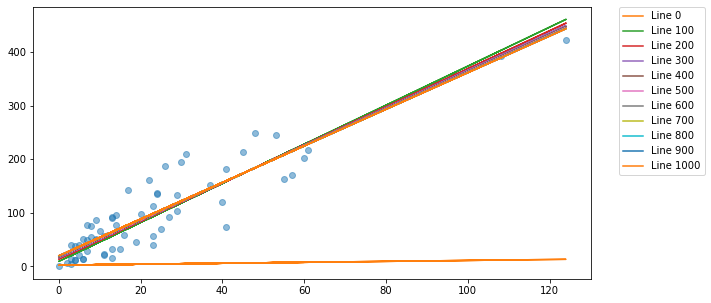

In [166]:
plt.figure(figsize=(10, 5))
# theta_list는 그냥 list니까 numpylist로 바꿔줌
theta_list = np.array(theta_list)
y_predict_step = np.dot(X, theta_list.transpose())

y_predict_step
plt.plot(raw_X, y, "o", alpha=0.5)
for i in range(0, len(cost_list), 100):
    plt.plot(raw_X, y_predict_step[:,i], label = 'Line %d'%i)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
plt.show()

- cost도 마찬가지, 처음엔 엄청 크다가 급격히 작아짐

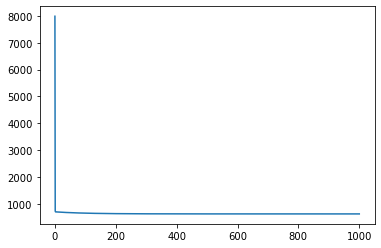

In [167]:
plt.plot(range(len(cost_list)), cost_list);

- 등고선으로도 확인하기

In [168]:
th0 = theta_list[:,0]
th1 = theta_list[:,1]
TH0, TH1 = np.meshgrid(th0, th1)

In [169]:
Js = np.array([cost_function(y, hypothesis_function(X, [th0, th1])) for th0, th1 in zip(np.ravel(TH0), np.ravel(TH1))])
Js = Js.reshape(TH0.shape)

<a list of 7 text.Text objects>

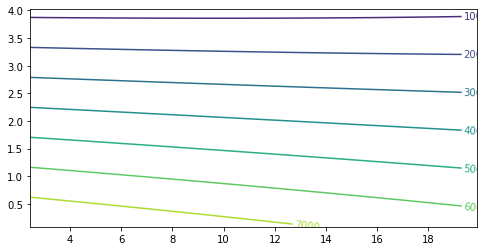

In [170]:
plt.figure(figsize=(8, 4))
CS = plt.contour(TH0, TH1, Js)
plt.clabel(CS, inline=True, fontsize=10, inline_spacing=2)

# 가로축 : th0
# 세로축 : th1
# 등고선 : cost

- 3차원으로 확인하기

In [171]:
from mpl_toolkits.mplot3d import Axes3D

ms = np.linspace(theta[0] - 15, theta[0] + 15, 100)
bs = np.linspace(theta[1] - 15, theta[1] + 15, 100)

M, B = np.meshgrid(ms, bs)
zs = np.array([cost_function(y, hypothesis_function(X, theta))
    for theta in zip(np.ravel(M), np.ravel(B))])
z = zs.reshape(M.shape)

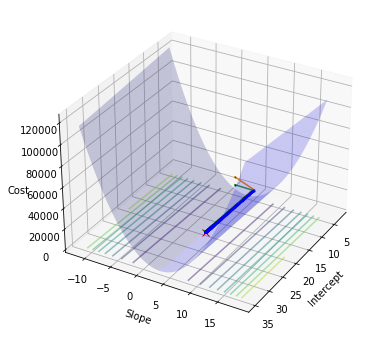

In [172]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.contour(M, B, z, 10, color='b', alpha=0.5, offset=0, stride=30)

ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Cost')
ax.view_init(elev=30, azim=30)
ax.plot([theta[0]], [theta[1]], [cost_list[-1]], markerfacecolor='r', markeredgecolor='r', marker='x', markersize=7);
ax.plot(theta_list[:,0], theta_list[:,1], cost_list, markerfacecolor='g', markeredgecolor='g', marker='o', markersize=1);
ax.plot(theta_list[:,0], theta_list[:,1], 0, markerfacecolor='b', markeredgecolor='b', marker='.', markersize=2);

# Slope : th1
# Intercept : th0

### [Multivariate Linear Regression]
- 한 개 이상의 Feature로 구성된 데이터를 분석할 때
- 식은 많아지지만 여전히 Cost함수의 최적화

#### [변수가 1개였을 때]
> ### $J(w_0,w_1) = \frac{1}{2m} \sum_{i=1}^m(w_1x^{(i)} + w_0 - y^{(i)})^2$
> ### $\frac{\partial J}{\partial w_0} = \frac{1}{m}\sum_{i=1}^m(w_1x^{(i)} + w_0 -y^{(i)})$
> ### $\frac{\partial J}{\partial w_1} = \frac{1}{m}\sum_{i=1}^m(w_1x^{(i)} + w_0 -y^{(i)})x^{(i)}$

#### [변수가 여러개일 때]
> #### $J(w_0,w_1,\cdots,w_n) = \frac{1}{2m} \sum_{i=1}^m(w_1x_1^{(i)} + w_2x_2^{(i)} + \cdots + w_nx_n^{(i)} + w_0 - y^{(i)})^2$
> #### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$=\frac{1}{2m}\sum_{i=1}^m(x^{(i)}w^T - y^{(i)})^2$
>
> #### $\frac{\partial J}{\partial w_0} = \frac{1}{m}\sum_{i=1}^m(x^{(i)}w^T - y^{(i)})$
> #### $\frac{\partial J}{\partial w_1} = \frac{1}{m}\sum_{i=1}^m(x^{(i)}w^T - y^{(i)})\cdot x_1$
> #### $\frac{\partial J}{\partial w_2} = \frac{1}{m}\sum_{i=1}^m(x^{(i)}w^T - y^{(i)})\cdot x_2$
> #### $\vdots$
> #### $\frac{\partial J}{\partial w_n} = \frac{1}{m}\sum_{i=1}^m(x^{(i)}w^T - y^{(i)})\cdot x_n$
### 여기서도 ! 모든 변수들($\theta$들)이 다 업데이트 되고 한번에 바뀜, 하나씩 바뀔때마다 중간중간 업데이트되는게 아님

In [173]:
from sklearn.datasets import load_boston
import random
%matplotlib inline

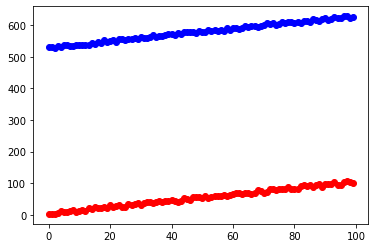

In [174]:
# 데이터 랜덤으로 생성
def gen_data(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 3))
    y = np.zeros(shape=numPoints)

    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = random.uniform(0, 1) * variance + i
        x[i][1] = random.uniform(0, 1) * variance + i
        x[i][2] = 1

        #our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance + 500
    return x, y

# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = gen_data(100, 25, 10)

plt.plot(x[:, 0:1], "ro")
plt.plot(y, "bo")

plt.show()

In [175]:
# 왼쪽에서부터 차례대로 x1, x2, x0
print(x[:5])
# y는 x의 값들에 500씩 더해서 생성
print(y[:5])

[[ 3.65485991  0.11568766  1.        ]
 [ 3.01305649  9.71647542  1.        ]
 [ 2.73982784  5.48477365  1.        ]
 [ 4.2283807   7.2688215   1.        ]
 [11.57059834  9.80612919  1.        ]]
[532.05801043 530.62852454 529.1909353  535.25408118 529.99219666]


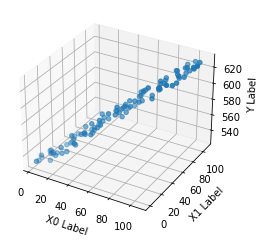

In [176]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:,1], y)

ax.set_xlabel('X0 Label')
ax.set_ylabel('X1 Label')
ax.set_zlabel('Y Label')

plt.show()

In [177]:
# Cost 구해주는 함수
def compute_cost(x, y, theta):
    # Comput cost for linear regression

    # Number of training samples
    m = y.size
    predictions = x.dot(theta)
    sqErrors = (predictions - y)

    J = (1.0 / (2 * m)) * sqErrors.T.dot(sqErrors)
    return J

In [178]:
def minimize_gradient(x, y, theta, iterations=100000, alpha=0.01):

    m = y.size
    cost_history = []
    theta_history = []

    for _ in range(iterations):
        predictions = x.dot(theta)

        for i in range(theta.size):
            partial_marginal = x[:, i]
            errors_xi = (predictions - y) * partial_marginal
            theta[i] = theta[i] - alpha * (1.0/m) * errors_xi.sum()

        if _ % 1000 == 0:
            theta_history.append(theta)
            cost_history.append(compute_cost(x, y, theta))

    return theta, np.array(cost_history), np.array(theta_history)

In [179]:
# 초기값을 어떻게 설정하느냐에 따라서도 성능이 달라진다.
theta_initial = np.ones(3)

theta, cost_history, theta_history = minimize_gradient(
        x, y, theta_initial, 1000000, 0.0001)
print("theta", theta)
# !! w1, w2, w0순서 !!

theta [3.97389450e-01 5.97735798e-01 5.25108238e+02]


In [180]:
# sklearn의 linearRegression모델(Normalequation으로 구성됨), 위의 함수들과 성능을 비교해보자
# 위에서 함수로 구현한 GD와 비교하여 성능이 잘 안나왔을 때는 iteration과 alpha 값을 조정하며 성능을 높여야한다

from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x[:, :2], y)

## The Coefficients
print('Coefficients : ', regr.coef_)
print('intercept : ', regr.intercept_)

Coefficients :  [0.39738945 0.59773579]
intercept :  525.1082379192226


In [181]:
# x의 10번째 값을 predict해보고 정답과 비교해보자
print(np.dot(theta, x[10]))
print(regr.predict(x[10,:2].reshape(1,2)))

536.7481071029708
[536.74810725]


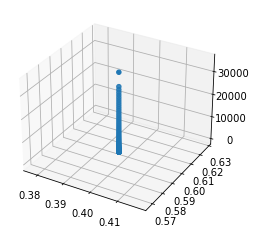

In [182]:
# 3차원으로 볼 때 cost값이 iteration이 늘어남에 따라 줄어들고 수렴한다(위에서 아래로)
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(theta_history[:, 0], theta_history[:, 1], cost_history, zdir="z")

plt.show()

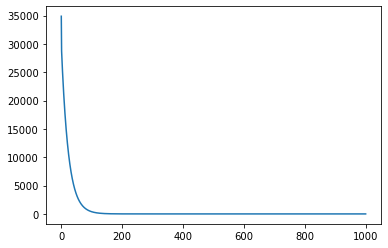

In [183]:
# 2차원으로 볼 때도 cost값이 iteration이 늘어남에 따라 줄어들고 수렴한다
plt.plot(cost_history)
plt.show()

### [Performance measure]
- 만들어진 모델의 성능은 어떻게 평가할 것인가? -> 평가할 수 있는 measure가 필요

- Mean Absolute Error
- MAE = $\frac{1}{m}\sum_{i=1}^m\left\vert y_i-\hat{y}_i \right\vert = \frac{1}{m}\sum_{i=1}^m\left\vert e_i \right\vert$
- 잔차의 절대값의 sum

In [184]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

0.5

- Root Mean Squared Error (RMSE)
- RMSE $= \sqrt{\frac{1}{n}\sum_{i=1}^n(y_i - \hat{y}_i)^2}$
- 잔차 제곱의 sum의 루트
- ! sklearn에 없어서 우리가 mse에 루트 씌워줘서 따로 만들어줘야된다.

In [185]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

0.5

- R squared
- $R^2 = 1 - \frac{\sum_i(y_i - \hat{y}_i)^2}{\sum_i(y_i - \mu)^2}$
- $0 \le R^2 \le 1 $, 크면 클수록 높은 적합도를 지님

In [186]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

0.5

#### Train Date(모델을 만드는 데이터)와 Test Data(평가받는 데이터)를 나누자

#### Training & Test data set
- Training한 데이터로 다시 Test를 할 경우, Training데이터에 과도하게 fitting된 모델을 사용될 수 있음 -> Overfitting 발생
- 새로운 데이터가 출현했을 때, robust(강건)하게 예측을 해야하는데, 기존 모델과의 차이가 존재하게 된다.
- 모델은 새로운 데이터가 처리가능하도록 generalize 되야함
- 이를 위해 ! Training Set과 Test Set을 분리함 !

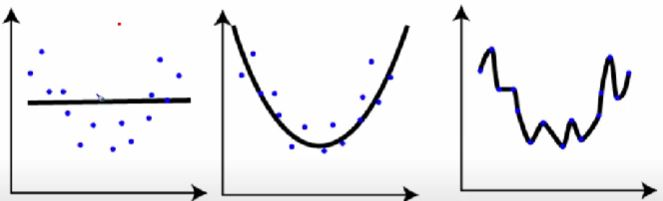

In [187]:
# 언더피팅,                제너럴라이즈한 모델,                오버피팅
Image("C:/Users/hyun/workspace/TIL/ML/0_references/images/6_오버피팅과언더피팅과제너럴.JPG")

- ML이나 Regression 같은경우에는 오차가 0인 모델을 만드는 것은 불가능.
- 그래서 그 오차를 최소화하는 Generalize한 모델을 만드는 것이 목표.
- 그 목표를 이루기 위해 Train data로만 학습하고 Test data로 평가하여 성능 향상 도모.

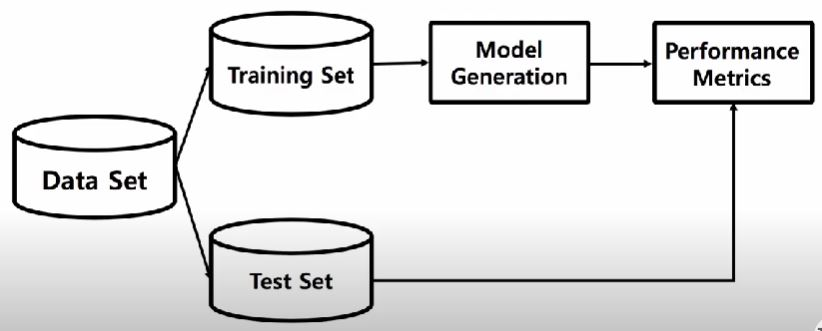

In [188]:
Image("C:/Users/hyun/workspace/TIL/ML/0_references/images/6_데이터활용순서.JPG")

1. 먼저 Train, Test 데이터를 8:2 혹은 7:3정도로 나눔
2. 그다음 Training Set을 통해 Model을 만들어낸다
3. 만들어낸 모델을 Test Set과 비교하여 모델 업데이트
4. 퍼포먼스를 측정한다.

#### [Holdout Method (Sampling)]
- 데이터를 Training과 Test로 나눠서 모델을 생성하고 테스트하는 기법
- 가장 일반적인 모델 생성을 위한 데이터 랜덤 샘플링 기법
- Training과 Test를 나누는 비율은 데이터의 크기에 따라 다름
- 일반적으로 Training Data 2/3, Test Data 1/3를 활용함(Random하게 !!!)

In [189]:
import numpy as np
from sklearn.model_selection import train_test_split

X,y = np.arange(10).reshape((5, 2)), range(5)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# feature인 X와 target인 y를 각각 test_size를 33%만큼 train, test로 나눈다

#### [Linear Regression with sklearn]
- 사실 앞에서 했던 numpy로 알고리즘을 구현하는 방식은 잘 안쓰고 주로 sklearn으로 쓴다.

#### Boston House Price Dataset
- 머신 러닝 등 데이터 분석을 처음 배울 때 가장 대표적으로 사용하는 Example Dataset
- 1978년 데이터, 미국 인구통계 조사 결과 미국 보스턴 지경의 주택 가격에 영향 요소들을 정리함

[데이터 로드]

In [190]:
# sklearn에서 저렇게 toy data들을 datasets를 통해 몇가지 제공한다.
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np

In [191]:
boston = load_boston() # dict 형식

##### sklearn 상에서 y데이터는 2dimension으로 되야해서 아래처럼 reshape해줬음

In [192]:
x_data = boston.data
y_data = boston.target.reshape(boston.target.size, 1)

In [193]:
print(x_data.shape)
print(y_data.shape)

(506, 13)
(506, 1)


[데이터 스케일링]

In [194]:
from sklearn import preprocessing

# MinMaxScaler 쓸 때, feature_range 주면 그 사이의 값으로 스케일링됨
minmax_scale = preprocessing.MinMaxScaler().fit(x_data)
x_scaled_data = minmax_scale.transform(x_data)

x_scaled_data[:3]

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, 0.00000000e+00,
        3.14814815e-01, 5.77505269e-01, 6.41606591e-01, 2.69203139e-01,
        0.00000000e+00, 2.08015267e-01, 2.87234043e-01, 1.00000000e+00,
        8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, 0.00000000e+00,
        1.72839506e-01, 5.47997701e-01, 7.82698249e-01, 3.48961980e-01,
        4.34782609e-02, 1.04961832e-01, 5.53191489e-01, 1.00000000e+00,
        2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, 0.00000000e+00,
        1.72839506e-01, 6.94385898e-01, 5.99382080e-01, 3.48961980e-01,
        4.34782609e-02, 1.04961832e-01, 5.53191489e-01, 9.89737254e-01,
        6.34657837e-02]])

[Trian - Test Split]

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled_data, y_data, test_size=0.33)

In [196]:
# 이 나눈 데이터 들 중 train 붙은 애들만 train에 활용함
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((339, 13), (167, 13), (339, 1), (167, 1))

[Linear regression fitting]

In [197]:
from sklearn import linear_model

# fit_intercept : w0, 절편을 넣을건지 말건지
# normalize : 추후 설명
# copy_X : X값이 훼손되지않게 복사본으로 진행할지
# n_jobs : 몇개의 cpu core를 쓸것인가
regr = linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
regr.fit(x_scaled_data, y_data)

# The Coefficients
print('Coefficient : ', regr.coef_) # w1~ w13까지 출력
print('intercept : ', regr.intercept_) # w0출력

Coefficient :  [[ -9.60975755   4.64204584   0.56083933   2.68673382  -8.63457306
   19.88368651   0.06721501 -16.22666104   7.03913802  -6.46332721
   -8.95582398   3.69282735 -19.01724361]]
intercept :  [26.62026758]


[수식 결과비교]

In [198]:
# regr안에 위에서 구한 weight값들이 다 저장되어있음, 아래는 x의 1번째 데이터 예측
regr.predict(x_data[0].reshape(1, -1))

array([[-496.63540908]])

- 위랑 같은 내용, 수식으로 표현하면
$\sum_{i=0}^{13} w_i x_i = w^T \cdot x$ 이렇게 나옴

In [199]:
x_data[0].dot(regr.coef_.T) + regr.intercept_
# coef 내적해주고 절편 더해줌

array([-496.63540908])

[Metric 측정]

In [200]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [201]:
y_true = y_test
y_hat = regr.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

(0.7308828902834397, 2.9584024525953274, 18.13875431250486)

In [202]:
y_true = y_train
y_hat = regr.predict(X_train)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

(0.7428171135008508, 3.424788710124306, 23.745169934414943)

### **[Stochastic Gradient Descent]**
- GD의 확장판

#### 

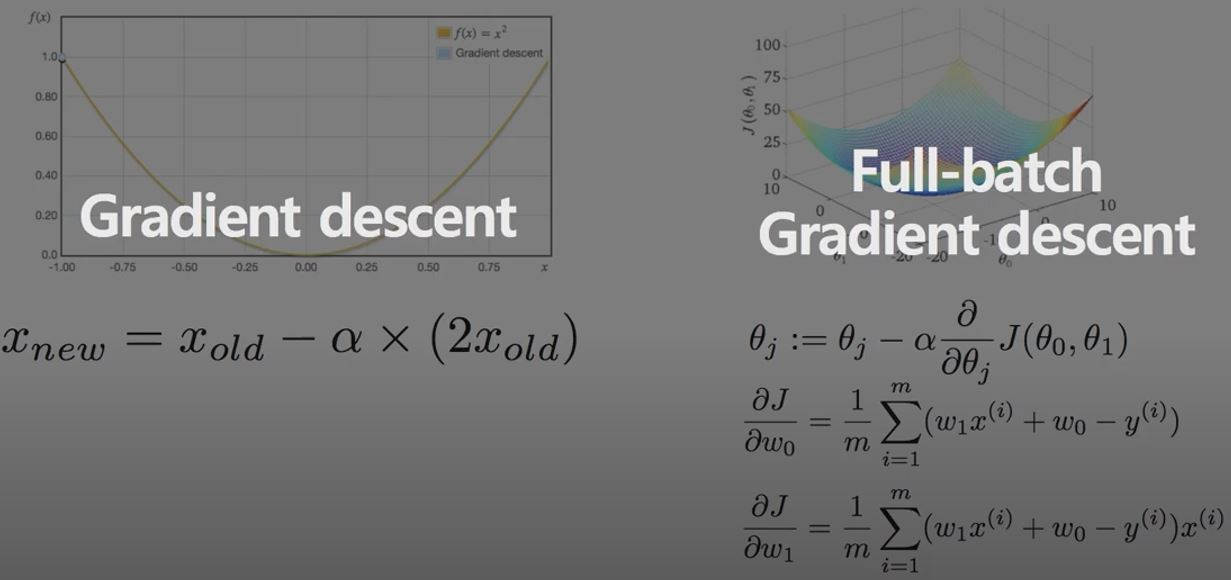

In [203]:
Image('C:/Users/hyun/workspace/TIL/ML/0_references/images/6_GD와fullbatchGD.JPG')

- 이론에서 배웠던 GD랑 구현 때 배웠던 GD랑 내용이 조금 달랐었음
- 사실 엄밀히 말하면 왼쪽 이미지는 GD이고 오른쪽 이미지는 Full-batch GD

#### **Full-batch Gradient descent를 쓰는이유**
- 지역 최저점(local optimum)에 빠지지않기 위해서
- 나중에 배울 stochastic GD처럼 랜덤하게 뽑아서 GD실행해줄수도 있음

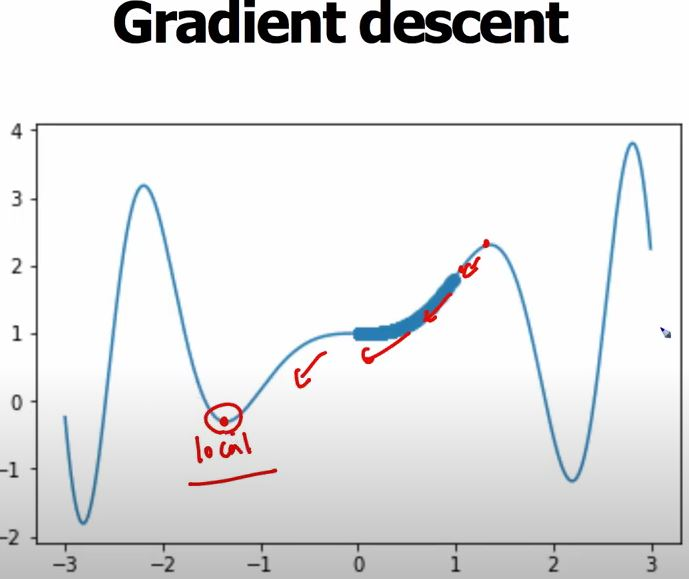

In [204]:
Image(filename = 'C:/Users/hyun/workspace/TIL/ML/0_references/images/6_localoptimum의문제.JPG',
      width = 500, height = 300)


#### $\frac{\partial J}{\partial w_n} = \frac{1}{m}\sum_{i=1}^m(w^Tx^{(i)} - y^{(i)})\cdot x_n$

- 전체값을 넣어줘서 계산한 다음 미분

#### $\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1)$ 
- 위의 식에서 미분한걸 $\frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1)$ 부분에 넣어줌


### **[Full -batch gradient descent]**
- GD는 1개의 데이터를 기준으로 미분
- 그러나 일반적으로 GD = (full) batch GD라고 가정
- 모든 데이터 셋을 학습 $\frac{\partial J}{\partial w_n} = \frac{1}{m}\sum_{i=1}^m(w^Tx^{(i)} - y^{(i)})\cdot x_n$
- 업데이트 감소 -> 계산상 효율적(속도) 가능 (single GD보다 속도 빠름)
- 안정적인 Cost 함수 수렴
- 지역 최적화 가능
- 메모리 문제( ex - 30억개의 데이터를 한번에 ) -> FullBatchGD를 못쓰는 경우 많음
- 대규모 dataset -> 모델/파라미터 업데이트가 느려짐

### **[Stochastic gradient descent]**
- Full-batch GD의 문제점을 보완하기위해 나옴
- dataset에서 random하게 training sample을 뽑은 후 학습할 때 사용함
- Data를 넣기 전에 Shuffle

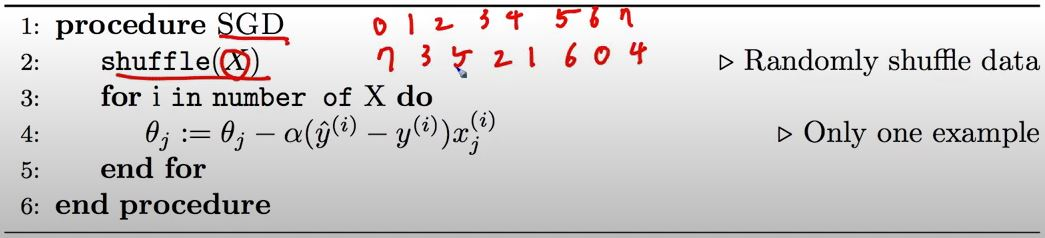

In [205]:
# SGD 알고리즘 - 데이터(X)를 섞은 다음 하나 뽑아서 업데이트
Image(filename = 'C:/Users/hyun/workspace/TIL/ML/0_references/images/6_SGD알고리즘.JPG',
      width = 600, height = 200)

- 빈번한 업데이트로 모델 성능 및 개선 속도 확인 가능
- 일부 문제에 대해 더 빨리 수렴
- 지역 최적화 **회피**
- **대용량 데이터**시 시간이 **오래**걸림
- 더이상 cost가 줄어들지 않는 시점의 발견이 어려움 (어디서 끊어야할지 알기 어려움)

### **[Mini-batch(stochastic) gradient descent]**
- SGD의 문제점을 보완하고자 만들어진 알고리즘
- Full-batch랑 같은 맥락이지만 데이터의 일부만 떼어서 진행
- 한번의 일정량의 데이터를 랜덤하게 뽑아서 학습
- SGD와 Batch GD를 혼합한 기법
- 가장 일반적으로 많이 쓰이는 기법

### **[Epoch & Batch-size]**
- 전체 데이터가 Training데이터에 들갈 때 카운팅
- Full-batch를 n번 실행하면 n epoch
- Epoch : 전체 데이터를 한 번 돌면 1epoch
- Batch-size : 한번에 학습되는 데이터의 개수
- 총 5120개의 Training data에 512 batch-size면 몇번 학습해야 1epoch이 될까 -> 10번

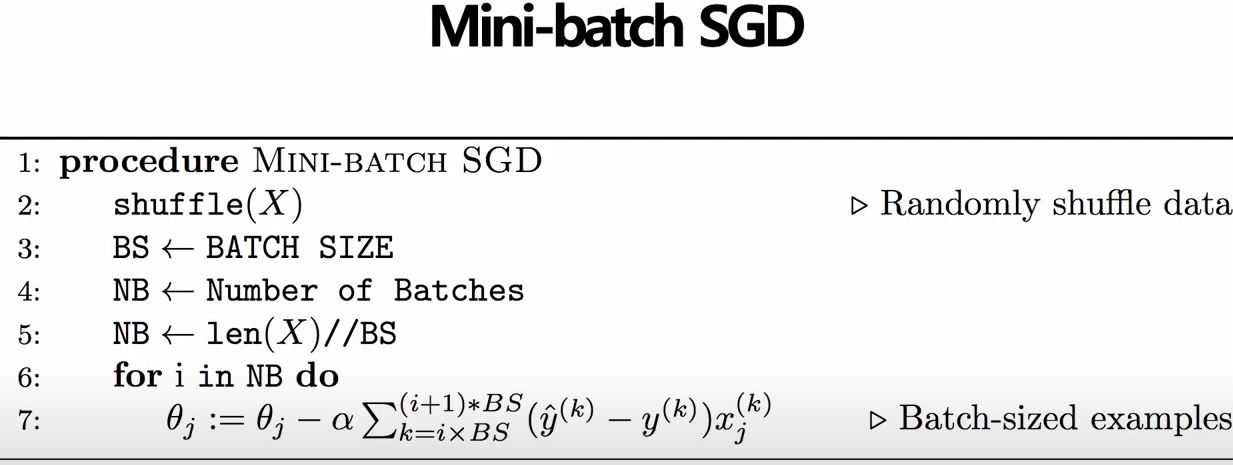

In [206]:
# Mini - batch SGD 알고리즘
Image(filename = 'C:/Users/hyun/workspace/TIL/ML/0_references/images/6_MinibatchSGD알고리즘.JPG',
      width = 600, height = 250)

### [SGD implrmentation issues]
- SGD를 구현할 때 생각해봐야 할 일들

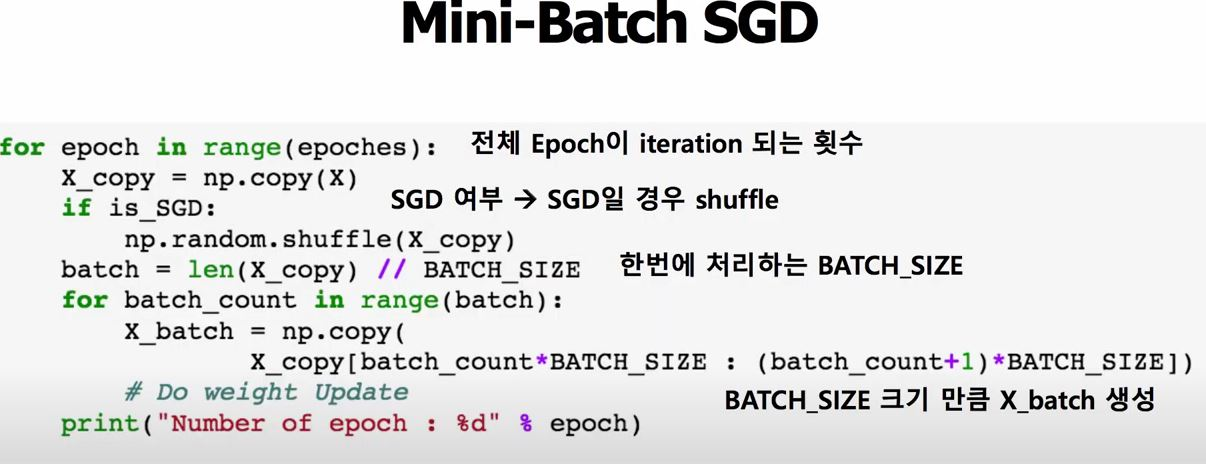

In [207]:
# Mini-Batch SGD 알고리즘
Image(filename = 'C:/Users/hyun/workspace/TIL/ML/0_references/images/6_minibatchSGD.JPG',
      width = 650, height = 300)

- [Convergence process]

In [208]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 

from sklearn.datasets._samples_generator import make_regression
X, y = make_regression(n_samples = 1000, # 데이터 갯수
                        n_features = 1, # 피쳐의 갯수
                        noise = 10, # 데이터의 퍼진정도, 20이면 더 퍼짐
                        random_state = 42) # 랜덤한 값 넣어줌. 아무거나 넣어줘도 됨

In [209]:
X[:10]

array([[-1.75873949],
       [ 1.03184454],
       [-0.48760622],
       [ 0.18645431],
       [ 0.72576662],
       [ 0.97255445],
       [ 0.64537595],
       [ 0.68189149],
       [-1.43014138],
       [ 1.06667469]])

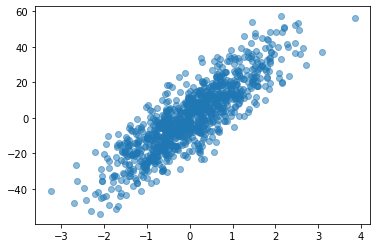

In [210]:
plt.plot(X, y, 'o', alpha = 0.5)

In [211]:
# gd 과제 이후에 해보자 ..ㅠ
# import linear_model_SGD
# import imp
# imp.reload(linear_model_SGD)

In [212]:
# gd_lr = linear_model.LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=1, shuffle=False) # eta : 초기의 learning rate
# bgd_lr = linear_model.LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=len(X), shuffle=False)
# sgd_lr = linear_model.LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=1, shuffle=True)
# msgd_lr = linear_model.LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=100, shuffle=True)

In [213]:
# plt.plot(range(len(gd_lr.cost_history)), gd_lr.cost_history, c="r")
# plt.plot(range(len(bgd_lr.cost_history)), bgd_lr.cost_history, c="y")
# plt.plot(range(len(sgd_lr.cost_history)), sgd_lr.cost_history, c="g")
# plt.plot(range(len(msgd_lr.cost_history)), msgd_lr.cost_history, c="b")

In [214]:
# plt.plot(range(50), sgd_lr.cost_history[:50], c="g")
# plt.plot(range(50), msgd_lr.cost_history[:50], c="b")

In [215]:
# gd_lr.coef, bgd_lr.coef, sgd_lr.coef, msgd_lr.coef

[Time-consuming]

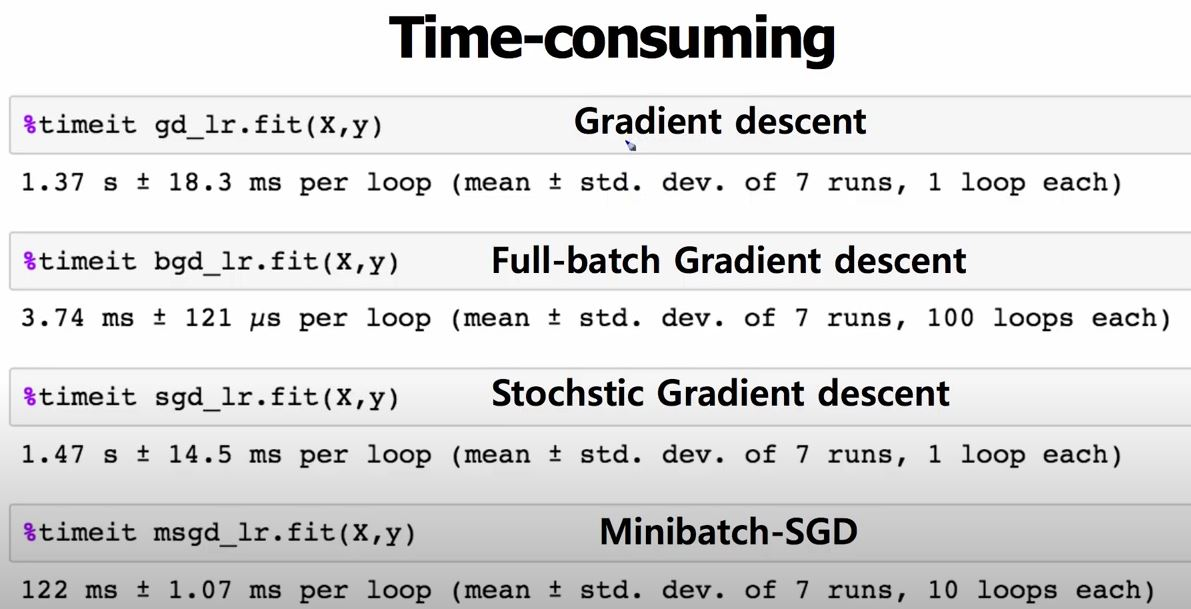

In [216]:
# 각 알고리즘들의 소요시간
Image(filename = 'C:/Users/hyun/workspace/TIL/ML/0_references/images/6_timeconsuming.JPG',
      width = 700, height = 350)

- %timeit : jupyter에서 제공하는 소요시간 출력문
- 주로 Minibatch-SGD를 많이 쓴다.

#### [Multivariate]
- Multi variable일 때 고려

In [217]:
import pandas as pd

data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 76, saw 3


In [ ]:
import numpy as np
ad_cost = np.asarray([data['TV'].values,data['radio'].values,data['newspaper'].values]).T
sales = np.asarray(data['sales'].values)

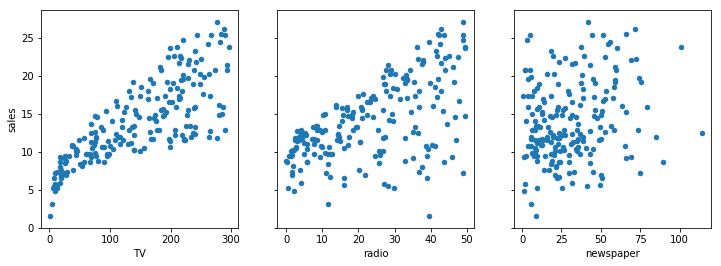

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(12, 4))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

##### Learning rate는 일정해야 하는가?
### [Learning-rate decay]
- 일정한 주기로 Learning rate을 감소시키는 방법
- 특정 epoch마다 Learning rate을 감소 (Optimal에 근접해질수록 더 작은 보폭으로 움직여야 더 잘 수렴할수 있다는 생각)
    - ```python 
    self._eta0 = self._eta0 * self._learning_rate_decay
    ```
- Hyper-parameter설정의 어려움
- 지수감소(완만하게 감소) :  $\alpha = \alpha_0 e^{-kt}$
- 1/t 감소(완만하게 감소) :  $\alpha = \frac{\alpha_0}{1 +kt}$
- 실제론 잘 안맞지만 있다는 것만 알고있자

### [종료조건 설정]
- SGD과정에서 특정 값 이하로 cost function이 줄어들지 않을 경우 GD를 멈추는 방법
- 성능이 좋아지지 않는/ 필요없는 연산을 방지함
- 종료조건 설정 : tol(허용치) > loss - previous_loss
- tol은 hyperparameter로 사람이 직접 설정함

## [Overfitting and Regularizatoin]

### [Overfitting]
- 학습데이터 과다 최적화 -> 새로운 데이터의 예측 하락
- 보다 적은 수의 논리(weight)로 설명이 가능한 경우, 많은 수의 논리(weight)를 세우지 말라 - Occam's razor
- [Bias - Variance tradeoff]
- Bias : 데이터가 너무 편향되어있음
- Variance : 너무 많은 데이터에 분산되어있음

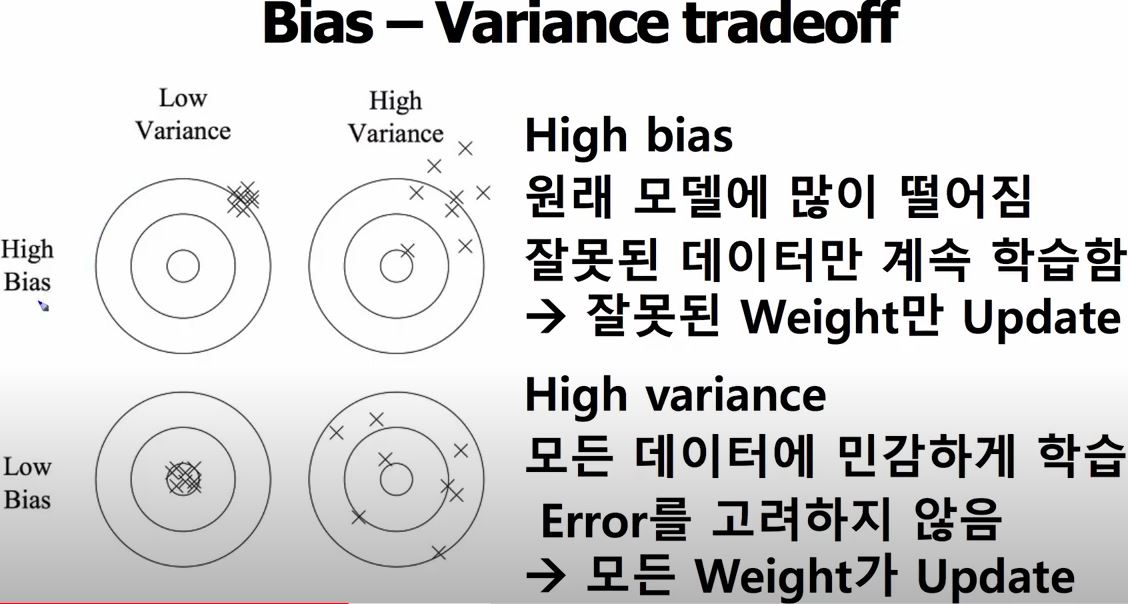

In [ ]:
# [Bias - Variance tradeoff]
Image(filename = 'C:/Users/hyun/workspace/TIL/ML/0_references/images/6_Bias_Variance_tradeoff.JPG',
      width = 700, height = 350)

#### [Train-Test Error]

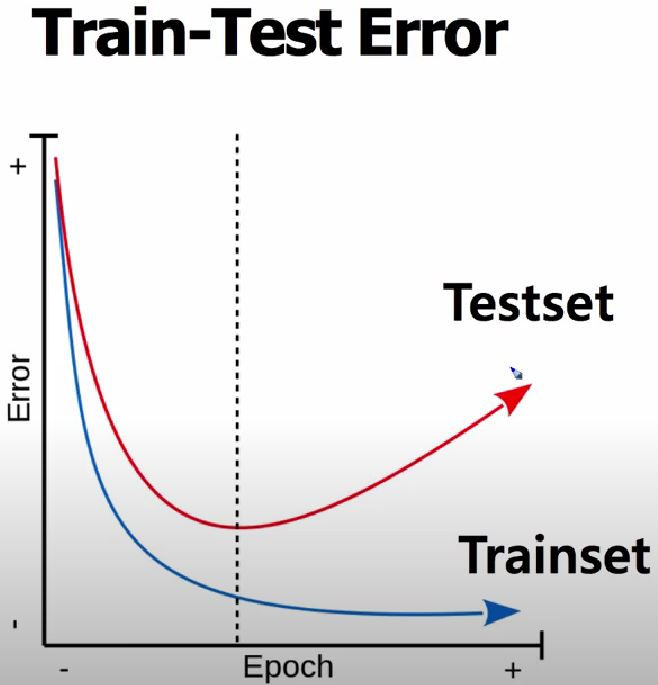

In [ ]:
# [Train-Test Error]
Image(filename = 'C:/Users/hyun/workspace/TIL/ML/0_references/images/6_TrainTestError.JPG',
      width = 350, height = 300)

- 일정 Epoch을 지나면서 Trainset은 overfitting이 일어나면서 Error가 줄어들지만 Testset의 Error는 늘어나면서 그 차이가 점점 커진다.
- 그래서 Early stop등의 기법을 활용할 때도 있다.

#### [Overcoming Overfitting]
- 더 많은 데이터를 활용한다.
- Feature의 개수를 줄인다.
- 적절히 Parameter를 선정한다.
- 결론은 결국 데이터를 더 정확하고 정교하게 수집하는게 베스트
- 하지만 그게 불가능에 가깝기 때문에 정규화(Regularization)활용

### **[Regularization]**
- 데이터들을 더 전체적으로 잘 설명하기 위해 weight에 벌점(penalty)을 줘서 피쳐의 영향력이 줄어들게끔, 모델을 더 간략화 하여 overfitting을 방지하고자 하는 전략

> - 만약 w1의 영향력을 줄이고자 한다면
> <br>$J(w_0,w_1) = \frac{1}{2m} \sum_{i=1}^m(w_1x^{(i)} + w_0 - y^{(i)})^2$
> - 해당 cost function식에
> <br>$J(w_0,w_1) = \frac{1}{2m} \sum_{i=1}^m(w_1x^{(i)} + w_0 - y^{(i)})^2 + 1000w_1$
> - 이런식으로 w1이 조금이라도 커지면 J가 커지게끔 w1에 벌점을 줘서 J값을 줄이기 위해 w1 값이 작아지게 하는 방법

### **[L2 regularization] - Ridge regression**
- 기존 Cost function L2(norm) penalty term을 추가
- #### $J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 + \frac{\lambda}{2}\sum_{j=1}^n \theta_j^2$
- norm : 벡터의 길이 혹은 크기를 측정하는 방법
- $\lVert (\theta) \rVert_2^2$ : L2는 Euclidean distance : 원점에서 벡터 좌표까지의 거리
- 절편은 건드릴수 없고 주로 feature들의 weight를 건드려서 정규화 진행한다.

- #### $J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 + \frac{\lambda}{2}\sum_{j=1}^n \theta_j^2$

- ##### $\theta_0 := \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta} (x^{(i)}) - y^{(i)})x_0^{(i)}$
- ##### $\theta_j := \theta_j - \alpha[(\frac{1}{m}\sum{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j) + \frac{\lambda}{m}\theta_j] j\in\{1,2, \cdots, n\}$

- $\theta_1$이외의 $\theta$들은 미분할 때 다 사라져서 $\frac{\lambda}{m}\theta_j$ 만 남음
- $\lambda$는 하이퍼파라미터로 패널티 값을 결정하는 파라메터이다. 그래서 저 값을 크게 줄수록 $\theta$는 작아져야만 함

- ##### $\theta_j := \theta_j - \alpha[(\frac{1}{m}\sum{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j) + \frac{\lambda}{m}\theta_j]$
- 이 식을 정리하여
- ##### $\theta_j := \theta_j(1-\alpha\frac{\lambda}{m}) - \alpha \frac{1}{m} \sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j$
- 이렇게 표현할 수 있고 여기서 $1-\alpha\frac{\lambda}{m}$는 양수이면서 점점 작아지기 때문에 $\theta_j$는 점점 작아질 것이다.

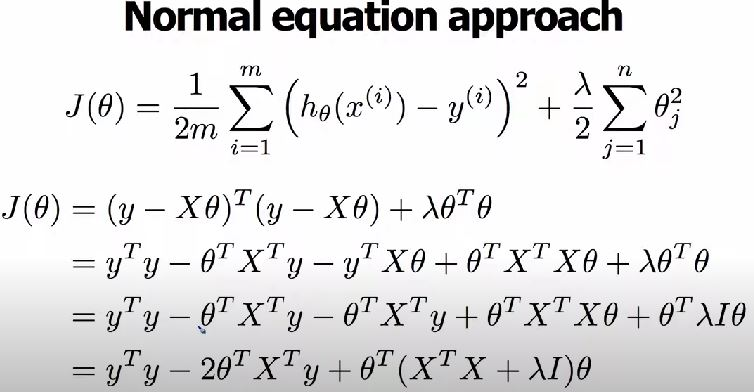

In [ ]:
# normal_equation_approach
Image(filename = 'C:/Users/hyun/workspace/TIL/ML/0_references/images/6_normal_equation_approach.JPG',
      width = 550, height = 260)


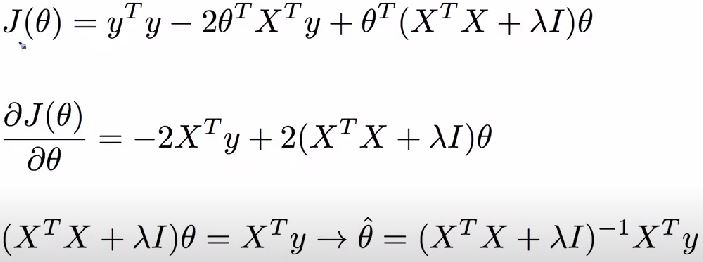

In [ ]:
Image(filename = 'C:/Users/hyun/workspace/TIL/ML/0_references/images/6_normal_equation_approach2.JPG',
      width = 450, height = 160)

- 위 식처럼 $J(\theta)$ 정의해주고 
- 그걸 $\theta$로 미분하면 두번째 줄 처럼 식이 유도되고 저 값을 0으로 만드는게 목표니까
- 마지막줄처렴 정리할 수 있다.
- 그리하여 최종적으로 $\hat{\theta}$ 유도가능

### [L1 regularization] - Lasso Regression
- 기존 Cost function L1(norm) penalty term을 추가
- #### $J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 + \frac{\lambda}{2}\sum_{j=1}^n \left\vert \theta_j \right\vert$
- norm : 벡터의 길이 혹은 크기를 측정하는 방법
- $\lVert x \rVert_1 := \sum_{i=1}^n \lvert x_i \rvert$ : L1는 mantattan distance : 원점에서 벡터 좌표까지의 거리

#### [L1 vs L2]

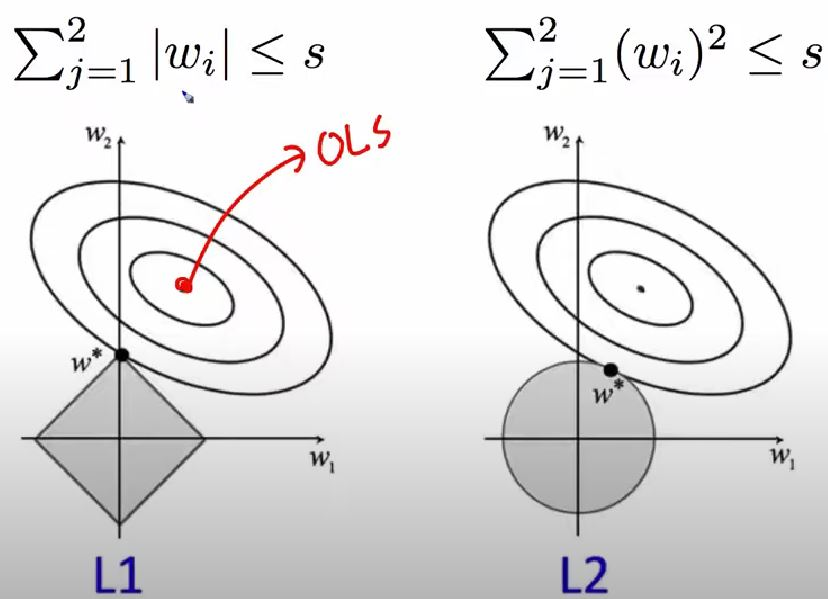

In [ ]:
Image(filename = 'C:/Users/hyun/workspace/TIL/ML/0_references/images/6_L1vsL2.JPG',
      width = 450, height = 250)

|L1|L2|
|------|---|
|Unstable solution|Stable solution|
|'One or More' solution|Only one solution|
|Sparse solution|Non-sparse solution|
|Feature selection||

#### [Sklearn Linear Model family]
- 지금까지의 방법들을 sklearn으로 확인해보자
##### Linear Regression with Normal Equation

In [219]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [220]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [221]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [222]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [223]:
X = df.values
y = boston.target
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

sklearn에서의 LinearRegression은 Normal Equation으로 구현
- Normal Equation의 장점 : 하이퍼 패러미터가 없어서 편리함

In [224]:
from sklearn.linear_model import LinearRegression
lr_ne = LinearRegression(fit_intercept = True)

In [225]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42
)

In [226]:
lr_ne.fit(X_train, y_train)

LinearRegression()

In [227]:
y_hat = lr_ne.predict(X_test)
y_true = y_test

In [228]:
rmse = np.sqrt(((y_hat - y_true) ** 2).sum() / len(y_true))
rmse

4.552364598463056

In [229]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_hat, y_true)
mse ** 0.5

4.552364598463056

Text(0.5, 1.0, 'Prices vs Predicted prices : $Y_i$ vs $\\hat{Y}_i$')

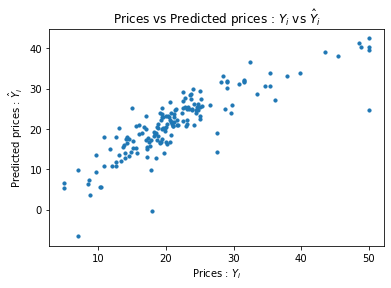

In [230]:
plt.scatter(y_true, y_hat, s = 10)
plt.xlabel("Prices : $Y_i$")
plt.ylabel("Predicted prices : $\hat{Y}_i$")
plt.title("Prices vs Predicted prices : $Y_i$ vs $\hat{Y}_i$")

#### Linear Regression with SGD

In [231]:
from sklearn.linear_model import SGDRegressor
lr_SGD = SGDRegressor()

In [232]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42
)

In [233]:
lr_SGD.fit(X_train, y_train)

SGDRegressor()

In [234]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [235]:
mse = mean_squared_error(y_hat, y_true)
rmse = np.sqrt(((y_hat - y_true) ** 2).sum() / len(y_true))
rmse, mse

(69111307443819.55, 4.7763728165941476e+27)

Text(0.5, 1.0, 'Prices vs Predicted prices : $Y_i$ vs $\\hat{Y}_i$')

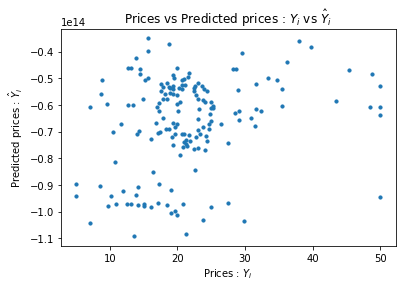

In [236]:
plt.scatter(y_true, y_hat, s = 10)
plt.xlabel("Prices : $Y_i$")
plt.ylabel("Predicted prices : $\hat{Y}_i$")
plt.title("Prices vs Predicted prices : $Y_i$ vs $\hat{Y}_i$")

In [237]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X)
X_scaled = std_scaler.transform(X)

In [238]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size = 0.33, random_state = 42
)

In [239]:
lr_SGD.fit(X_train, y_train)

SGDRegressor()

In [240]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [241]:
mse = mean_squared_error(y_hat, y_true)
rmse = np.sqrt(((y_hat - y_true) ** 2).sum() / len(y_true))
rmse, mse

(4.61729922797279, 21.319452160638125)

Text(0.5, 1.0, 'Prices vs Predicted prices : $Y_i$ vs $\\hat{Y}_i$')

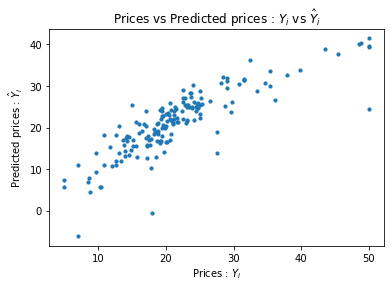

In [242]:
plt.scatter(y_true, y_hat, s = 10)
plt.xlabel("Prices : $Y_i$")
plt.ylabel("Predicted prices : $\hat{Y}_i$")
plt.title("Prices vs Predicted prices : $Y_i$ vs $\hat{Y}_i$")

### Linear Regression with Ridge & Lasso Regression

In [243]:
from sklearn.linear_model import Lasso, Ridge

In [244]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size = 0.33, random_state = 42
)

In [245]:
ridge = Ridge(fit_intercept = True, alpha = 0.5) # 여기서 alpha는 lambda를 의미
ridge.fit(X_train, y_train)
# lasso = Lasso(fit_intercept = True, alpha = 0.5)

Ridge(alpha=0.5)

In [246]:
y_hat = ridge.predict(X_test)
y_true = y_test
mse = mean_squared_error(y_hat, y_true)
rmse = np.sqrt(((y_hat - y_true) ** 2).sum() / len(y_true))
rmse, mse

(4.553881119814412, 20.73783325340217)

Text(0.5, 1.0, 'Prices vs Predicted prices : $Y_i$ vs $\\hat{Y}_i$')

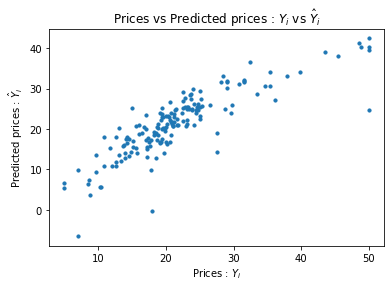

In [247]:
plt.scatter(y_true, y_hat, s = 10)
plt.xlabel("Prices : $Y_i$")
plt.ylabel("Predicted prices : $\hat{Y}_i$")
plt.title("Prices vs Predicted prices : $Y_i$ vs $\hat{Y}_i$")

In [248]:
from sklearn.model_selection import KFold

print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(0.01, 20, 50) # alpha는 여기서 lambda를 의미
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    ridge = Ridge(fit_intercept = True, alpha = a)

    # computing the RMSE on training data
    ridge.fit(X_train, y_train)
    p = ridge.predict(X_test)
    err = p - y_test
    total_error = np.dot(err, err)
    rmse_train = np.sqrt(total_error / len(p))

    # computing RMSE using 10-fold cross validation
    kf = KFold(10)
    xval_err = 0
    for train, test in kf.split(X):
        ridge.fit(X[train], y[train])
        p = ridge.predict(X[test])
        err = p - y[test]
        xval_err += np.dot(err, err)
    rmse_10cv = np.sqrt(xval_err / len(X))

    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a, rmse_train, rmse_10cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_10cv

0.010	 4.5524		 5.8757
0.418	 4.5536		 5.8419
0.826	 4.5549		 5.8270
1.234	 4.5561		 5.8186
1.642	 4.5574		 5.8126
2.050	 4.5586		 5.8078
2.458	 4.5598		 5.8034
2.866	 4.5611		 5.7993
3.274	 4.5623		 5.7953
3.682	 4.5635		 5.7912
4.090	 4.5647		 5.7873
4.498	 4.5660		 5.7833
4.906	 4.5672		 5.7793
5.313	 4.5684		 5.7753
5.721	 4.5696		 5.7714
6.129	 4.5708		 5.7674
6.537	 4.5720		 5.7635
6.945	 4.5731		 5.7596
7.353	 4.5743		 5.7557
7.761	 4.5755		 5.7518
8.169	 4.5766		 5.7479
8.577	 4.5778		 5.7441
8.985	 4.5789		 5.7404
9.393	 4.5801		 5.7366
9.801	 4.5812		 5.7329
10.209	 4.5824		 5.7292
10.617	 4.5835		 5.7256
11.025	 4.5846		 5.7220
11.433	 4.5857		 5.7184
11.841	 4.5868		 5.7149
12.249	 4.5879		 5.7114
12.657	 4.5890		 5.7079
13.065	 4.5901		 5.7045
13.473	 4.5912		 5.7011
13.881	 4.5923		 5.6978
14.289	 4.5933		 5.6945
14.697	 4.5944		 5.6912
15.104	 4.5955		 5.6880
15.512	 4.5965		 5.6848
15.920	 4.5976		 5.6816
16.328	 4.5986		 5

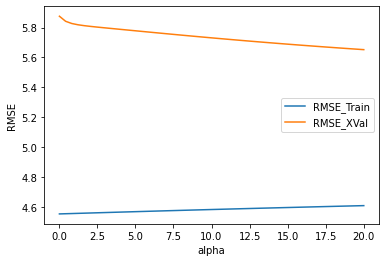

In [249]:
plt.plot(alpha, t_rmse, label = 'RMSE_Train')
plt.plot(alpha, cv_rmse, label = 'RMSE_XVal')
plt.legend(('RMSE_Train', 'RMSE_XVal'))
plt.ylabel('RMSE')
plt.xlabel('alpha')
plt.show()

In [250]:
a = 0.3
for name,met in [
        ('linear regression', LinearRegression()),
        ('lasso', Lasso(fit_intercept=True, alpha=a)),
        ('ridge', Ridge(fit_intercept=True, alpha=a)),
        ]:
    met.fit(X_train,y_train)
    # p = np.array([met.predict(xi) for xi in x])
    p = met.predict(X_test)
    e = p-y_test
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))

    kf = KFold(10)
    err = 0
    for train,test in kf.split(X):
        met.fit(X[train],y[train])
        p = met.predict(X[test])
        e = p-y[test]
        err += np.dot(e,e)

    rmse_10cv = np.sqrt(err/len(X))
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: linear regression
RMSE on training: 4.5524
RMSE on 10-fold CV: 5.8770
Method: lasso
RMSE on training: 4.8453
RMSE on 10-fold CV: 5.7637
Method: ridge
RMSE on training: 4.5533
RMSE on 10-fold CV: 5.8487


#### [Polynomial Regression] - 다항방정식, 다항으로 된 회귀방정식
- 1차 방정식을 고차다항식으로 변경하는 기법 (ex 가로 세로길이가 넓이에 영향을 미치지만 그걸 곱한 대각선 길이도 영향을 끼칠수 있다)
- $x_1 + x_2 \rightarrow x_1 + x_2 + x_1 x_2 + x_1^2 + x_2^2$
- sklearn.preprocession.PolynomialFeatures 사용

In [251]:
import numpy as np

X = np.arange(6).reshape(3,2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

- degree : 고차원의 정도

In [252]:
from sklearn.preprocessing import PolynomialFeatures

# degree : 2
poly = PolynomialFeatures(2)
poly.fit_transform(X)

# x0, x1, x2, x1^2, x1x2, x2^2

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [253]:
# 교차만 나타나게
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)

# x0, x1, x2, x1x2

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

In [254]:
import numpy as np
import matplotlib.pyplot as plt

In [255]:
def f(size):
    x = np.linspace(0,5,size)
    y = x * np.sin(x**2) + 1
    return (x,y)

In [256]:
def sample(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x **2) + 1 + np.random.randn(x.size) * 0.5
    return (x, y)

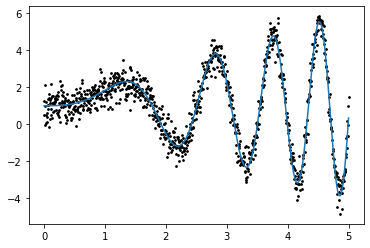

In [257]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
X, y = sample(1000)
plt.scatter(X, y, s = 3, c = 'black')
plt.show()

In [258]:
X.shape, y.shape

((1000,), (1000,))

- two dimension으로 바꾸기

In [259]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [260]:
X.shape, y.shape

((1000, 1), (1000, 1))

1. Linear Regrssion

In [261]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

현재 two dimension이기 때문에 one dimension으로 바꿔야함
->.flatten()

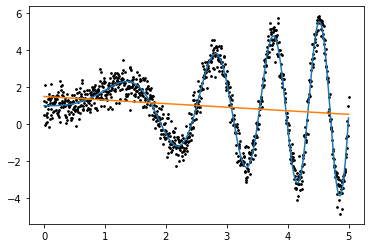

In [262]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c = 'black')
plt.plot(X.flatten(), lr.predict(X).flatten())
plt.show()

2. Polynomial Regression

In [263]:
from sklearn.preprocessing import PolynomialFeatures

In [264]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
X_poly[:4]

# x0, x1, x1^2

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04],
       [1.00000000e+00, 1.50150150e-02, 2.25450676e-04]])

In [265]:
lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression()

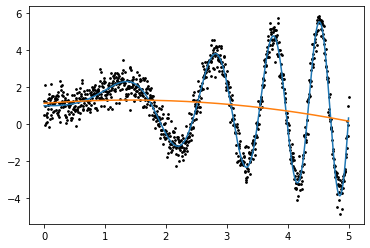

In [266]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s =3, c = 'black')
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

- Degree 증가시켜보기

In [267]:
poly_features = PolynomialFeatures(degree=15)
X_poly = poly_features.fit_transform(X)
X_poly[:4]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05, 1.25375751e-07,
        6.27506263e-10, 3.14067198e-12, 1.57190790e-14, 7.86740691e-17,
        3.93764110e-19, 1.97079134e-21, 9.86382051e-24, 4.93684710e-26,
        2.47089445e-28, 1.23668391e-30, 6.18960915e-33, 3.09790248e-35],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04, 1.00300601e-06,
        1.00401002e-08, 1.00501504e-10, 1.00602106e-12, 1.00702808e-14,
        1.00803612e-16, 1.00904517e-18, 1.01005522e-20, 1.01106629e-22,
        1.01207837e-24, 1.01309146e-26, 1.01410556e-28, 1.01512068e-30],
       [1.00000000e+00, 1.50150150e-02, 2.25450676e-04, 3.38514528e-06,
        5.08280073e-08, 7.63183292e-10, 1.14592086e-11, 1.720

In [268]:
lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression()

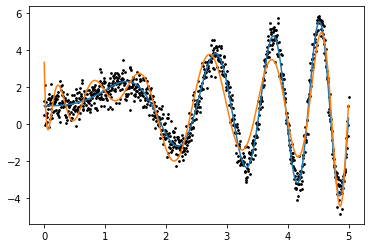

In [269]:
f_x, f_y = f(1000)

plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s =3, c = 'black')
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

#### [How to optimize]
- RMSE의 최소값을 찾자
- Ridge, Lasso, LR 모두다 써보자 (SGD는 느리고 쓸필요 없음!)
- Degree를 10~50까지 써보기
- 결과를 한눈에 정리해보기

In [270]:
def rmse(predictions, targets):
    return np.sqrt( ( (predictions - targets) ** 2 ).mean() )

In [271]:
poly_range = list(range(10,50)) # 10 ~50
poly_range[:5]

[10, 11, 12, 13, 14]

In [272]:
rmse_lr_list = []
rmse_lasso_list = []
rmse_ridge_list = []

In [273]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings(action='ignore')

In [274]:
for poly_vlaue in poly_range:

    poly_features = PolynomialFeatures(degree = poly_vlaue)
    X_poly = poly_features.fit_transform(X)

    lr = LinearRegression()
    lr.fit(X_poly, y)
    rmse_lr_list.append(rmse(lr.predict(X_poly), y))

    lasso = Lasso()
    lasso.fit(X_poly, y)
    rmse_lasso_list.append(rmse(lasso.predict(X_poly), y))

    ridge = Ridge()
    ridge.fit(X_poly, y)
    rmse_ridge_list.append(rmse(ridge.predict(X_poly), y))

In [275]:
import pandas as pd
from pandas import DataFrame

data = {'poly_range' : poly_range, 'lr_rmse' : rmse_lr_list, 'lasso_rmse' : rmse_lasso_list, 'ridge_rmse' : rmse_ridge_list}

df = DataFrame(data).set_index('poly_range')
df.head()

,lr_rmse,lasso_rmse,ridge_rmse
poly_range,,,
10,1.885843,2.178739,1.911258
11,1.875900,2.185849,1.891573
12,1.630555,2.190038,1.889891
13,1.351039,2.192308,1.861794
14,1.338567,2.193588,1.717317


In [277]:
df.min()
# ridge_rmse가 가장 작은 것을 확인할 수 있다.

lr_rmse       0.516030
lasso_rmse    2.178739
ridge_rmse    0.507897
dtype: float64

In [278]:
df['ridge_rmse'].sort_values().head()
# degree = 22일 때 가장 작은 것을 확인할 수 있다.

poly_range
23    0.507897
22    0.509272
24    0.547695
25    0.608839
21    0.614846
Name: ridge_rmse, dtype: float64

In [279]:
poly_features = PolynomialFeatures(degree = 22)
X_poly = poly_features.fit_transform(X)
ridge = Ridge()
ridge.fit(X_poly, y)

Ridge()

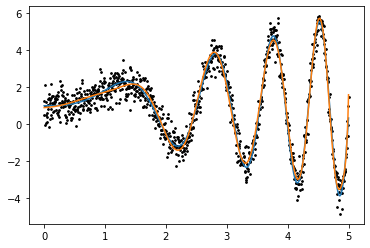

In [280]:
f_x , f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s= 3, c ='black')
plt.plot(X.flatten(), ridge.predict(X_poly).flatten())
plt.show()

fit_intercept = False로 해줄 경우

In [281]:
poly_features = PolynomialFeatures(degree = 22)
X_poly = poly_features.fit_transform(X)
ridge = Ridge(fit_intercept=False)
ridge.fit(X_poly, y)

Ridge(fit_intercept=False)

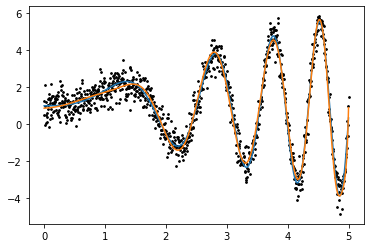

In [282]:
f_x , f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s= 3, c ='black')
plt.plot(X.flatten(), ridge.predict(X_poly).flatten())
plt.show()

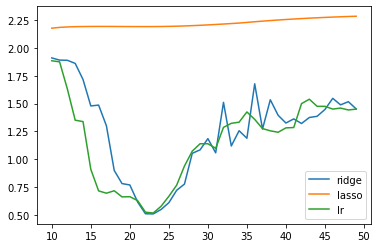

In [283]:
plt.plot(poly_range, df['ridge_rmse'], label = 'ridge')
plt.plot(poly_range, df['lasso_rmse'], label = 'lasso')
plt.plot(poly_range, df['lr_rmse'], label = 'lr')
plt.legend()

#### Polynomial Features는 언제 사용할까?
- 한개 변수가 Y값과 비선형적인 관계가 있다고 의심
: 일부분만 추출해서 사용가능
- 주기적인 패턴을 보이는 Series Data
- 모델 자체가 복잡해지면 해결가능한 부분이 많음
 -> SVM, Tree-based models

#### [Performance Measure Techniques (Sampling Method)]
- 성능 측정을 위해 데이터를 나누는 방법

##### [Training - Validation - Test]
- 주로 6:2:2비율로 많이 사용
- Training : Model Building
- Validation : Model Check
- Test : Model Evaluation

#### [Validation set]
- Test Set은 Model이 생성 시 절대 Training Set에 포함되지 않아야함
- Test Set과 달리 Model 생성시 Model에 성능을 평가하기 위해 사용
- Hyper Parameter Turning 시 성능 평가를 위해 Overfitting 방지
- Training 중간에 Model 성능 점검

#### [K-fold cross validation]
- 학습 DATA를 K번 나눠서 Test, Train을 실시
->평균값 사용, index 사용
- 모델의 Parameter 튜닝, 간단한 모델의 최종 성능 측정 등 사용

In [284]:
from sklearn import datasets
import warnings
warnings.filterwarnings(action ='ignore')

boston = datasets.load_boston()

In [285]:
X = boston.data
y = boston.target

In [286]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle =True)

for train_index, test_index in kf.split(X):
    print('TRAIN - ', 'len : ', len(train_index), train_index[:10] )
    print('TEST - ', 'len : ', len(test_index), test_index[:10])

TRAIN -  len :  455 [0 1 2 3 4 5 6 7 8 9]
TEST -  len :  51 [13 23 24 39 43 54 55 57 59 62]
TRAIN -  len :  455 [ 0  1  2  3  4  5  7 10 11 13]
TEST -  len :  51 [ 6  8  9 12 22 26 44 58 66 92]
TRAIN -  len :  455 [ 0  1  2  3  4  5  6  8  9 10]
TEST -  len :  51 [ 7 17 30 32 33 36 38 45 53 73]
TRAIN -  len :  455 [ 0  2  4  6  7  8  9 10 11 12]
TEST -  len :  51 [ 1  3  5 19 21 37 42 70 79 80]
TRAIN -  len :  455 [ 0  1  3  4  5  6  7  8  9 10]
TEST -  len :  51 [ 2 25 27 28 34 56 60 76 77 81]
TRAIN -  len :  455 [0 1 2 3 4 5 6 7 8 9]
TEST -  len :  51 [ 41  48  50  63  69  71  97 103 106 120]
TRAIN -  len :  456 [0 1 2 3 4 5 6 7 8 9]
TEST -  len :  50 [10 11 15 16 51 52 61 64 75 83]
TRAIN -  len :  456 [0 1 2 3 4 5 6 7 8 9]
TEST -  len :  50 [14 18 20 29 47 85 89 95 98 99]
TRAIN -  len :  456 [ 1  2  3  4  5  6  7  8  9 10]
TEST -  len :  50 [ 0 31 35 49 65 67 68 74 90 91]
TRAIN -  len :  456 [ 0  1  2  3  5  6  7  8  9 10]
TEST -  len :  50 [  4  40  46  72  78  87 111 114 128 140]


In [287]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits = 10)
lasso_regressor = Lasso()
ridge_regressor = Ridge()

lasso_mse = []
ridge_mse = []

for train_index, test_index in kf.split(X):
    lasso_regressor.fit(X[train_index], y[train_index])
    ridge_regressor.fit(X[train_index], y[train_index])

    lasso_mse.append(mean_squared_error(y[test_index], lasso_regressor.predict(X[test_index])))
    ridge_mse.append(mean_squared_error(y[test_index], ridge_regressor.predict(X[test_index])))

# Average
sum(lasso_mse) / 10, sum(ridge_mse) / 10

(34.46408458830232, 34.07824620925941)

#### 사실, 위보다 더 간단한 방법이 있음
- cross_val_score : 위 과정을 한번에
- sklearn은 pipeline등을 위해 'High is better'로 처리
-> MSE를 Negative로 변환
- 이로 인해 RMSE 지원 X
- cv : kfold split 횟수 만큼 cross validation score 계산
- neg : negative 작은게 좋은 걸로 인지

In [288]:
from sklearn.model_selection import cross_val_score
import numpy as np

lasso_regressor = Lasso(warm_start = False)
ridge_regressor = Ridge()

lasso_scores = cross_val_score(lasso_regressor, X, y, cv = 10, scoring = 'neg_mean_squared_error')
ridge_scores = cross_val_score(ridge_regressor, X, y, cv = 10, scoring = 'neg_mean_squared_error')

np.mean(lasso_scores), np.mean(ridge_scores)

(-34.46408458830232, -34.078246209259405)

In [289]:
# cross_validate 보다는 cross_val_score를 자주 사용
from sklearn.model_selection import cross_validate
import numpy as np

lasso_regressor = Lasso(warm_start = False)
ridge_regressor = Ridge()

lasso_scores = cross_validate(lasso_regressor, X, y, cv = 10, scoring = 'neg_mean_squared_error')
ridge_scores = cross_validate(ridge_regressor, X, y, cv = 10, scoring = 'neg_mean_squared_error')
ridge_scores

{'fit_time': array([0.00099635, 0.00099993, 0.        , 0.        , 0.00099993,
        0.00099993, 0.        , 0.        , 0.        , 0.00100923]),
 'score_time': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00100017, 0.        , 0.        , 0.        ]),
 'test_score': array([  -9.31766315,  -12.60806897,  -10.79859434,  -36.6093648 ,
         -29.62109212,  -18.62598134,   -9.46641896, -168.49831117,
         -33.79749469,  -11.43947255])}

#### Leave One Out(LOO) (잘 안쓰긴함)
- Simple cross validation  k = data size
- 한번에 한 개의 data만 Test set으로 사용함  총 k번 iteration
- 속도 오래 걸림

In [290]:
from sklearn.model_selection import LeaveOneOut

test = [1,2,3,4]
loo = LeaveOneOut()

for train, test in loo.split(test):
    print('%s %s' % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [291]:
loo = LeaveOneOut()

lasso_scores = cross_val_score(lasso_regressor, X, y, cv = loo, scoring = 'neg_mean_squared_error')
ridge_scores = cross_val_score(ridge_regressor, X, y, cv = loo, scoring = 'neg_mean_squared_error')

np.mean(lasso_scores), np.mean(ridge_scores)

(-28.40926676204934, -23.862836317209926)

#### [Validation set for parameter turning]
- Validation set의 많은 이유 중 하나가 Hyper parameter turning
- Number of iterations (SGD), Number of branch (Tree-based) etc.
- Validation set의 성능으로 최적의 parameter 찾음
- Validation set 결과와 Training set 결과의 차이가 벌어지면 Overfitting

In [292]:
def rmse(predictions, targets):
    return np.sqrt(( (predictions - targets)**2 ).mean())

In [293]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X)
X_scaled = std.transform(X)

# Learning rate
eta0 = 0.00000001
max_iter = 10000

In [294]:
from sklearn.model_selection import train_test_split

X_train_dataset, X_test, y_train_dataset, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42)

sgd_regressor = SGDRegressor(
    eta0 = eta0, max_iter = max_iter, warm_start =True, learning_rate = 'constant')

rmse_val_score = []
rmse_train_score = []
model_list = []

X_train, X_val, y_train, y_val = train_test_split(
    X_train_dataset, y_train_dataset, test_size = 0.2, random_state =42)

sgd_regressor.fit(X_train, y_train)

# kf = KFold(n_splits = 100, shuffle = True)
#   for train_index, test_index in kf.split(X_train_dataset):

for i in range(300):
    y_pred = sgd_regressor.predict(X_train)
    y_true = y_train
    rmse_train_score.append( rmse(y_pred, y_true) )

    y_pred = sgd_regressor.predict(X_val)
    y_true = y_val
    rmse_val_score.append( rmse(y_pred, y_true) )
    model_list.append(sgd_regressor)    

    coef = sgd_regressor.coef_.copy()
    intercept = sgd_regressor.intercept_.copy()

    sgd_regressor = SGDRegressor(
        eta0 = eta0, max_iter = max_iter, warm_start =True, learning_rate = 'constant')

    sgd_regressor.fit(X_train, y_train, coef_init = coef, intercept_init = intercept)

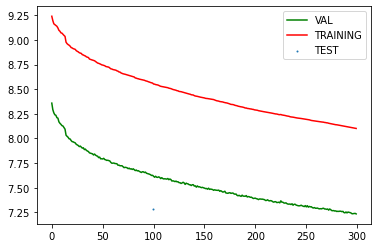

In [295]:
plt.plot( range(len(rmse_val_score)), rmse_val_score, c = 'g', label = 'VAL')
plt.plot( range(len(rmse_train_score)), rmse_train_score, c = 'r', label = 'TRAINING')
plt.scatter( 99, rmse(y_test, sgd_regressor.predict(X_test)), s=1, label = 'TEST')
plt.legend()
plt.show()

In [296]:
np.argsort(rmse_val_score)

array([299, 295, 296, 297, 298, 294, 290, 288, 293, 287, 292, 291, 289,
       285, 280, 282, 286, 281, 284, 283, 278, 279, 276, 275, 277, 272,
       274, 270, 269, 273, 268, 271, 265, 263, 264, 262, 266, 267, 259,
       260, 261, 257, 256, 258, 252, 250, 254, 255, 248, 253, 247, 243,
       246, 242, 251, 244, 249, 241, 245, 237, 240, 235, 238, 239, 233,
       232, 234, 236, 231, 229, 228, 230, 224, 221, 222, 227, 223, 226,
       218, 219, 220, 217, 216, 214, 225, 213, 215, 210, 211, 212, 209,
       203, 208, 206, 207, 205, 204, 202, 201, 198, 199, 200, 197, 195,
       196, 192, 194, 193, 186, 190, 188, 189, 185, 183, 191, 182, 184,
       187, 180, 181, 179, 176, 173, 172, 177, 178, 171, 174, 175, 168,
       169, 167, 165, 170, 166, 163, 159, 162, 161, 164, 160, 158, 155,
       157, 153, 156, 151, 152, 154, 150, 149, 147, 148, 146, 142, 144,
       145, 140, 143, 141, 137, 136, 135, 138, 139, 131, 134, 133, 127,
       132, 128, 130, 126, 125, 129, 123, 124, 121, 122, 120, 11

In [297]:
model_list[296].coef_

array([-0.07157642,  0.11174987, -0.05439661,  0.00515537,  0.00243746,
        0.09196626,  0.08522775,  0.01318054, -0.00380339,  0.00169393,
        0.04755544,  0.0480104 , -0.25855261])

In [298]:
model_list[0].coef_

array([-2.43935981e-03,  1.06964074e-02, -1.41689116e-03,  8.23985156e-05,
        7.14143950e-05,  2.19018953e-03,  4.85941006e-03,  1.19402096e-03,
       -1.38924343e-03,  5.21850281e-04,  2.40986891e-03,  6.05541264e-02,
       -4.04667719e-03])

In [299]:

model_list[296].predict(X_test)

array([25.49654287, 27.0044034 , 23.6896193 , 19.46067832, 23.11465417,
       22.67235013, 22.5276972 , 21.48175614, 24.72838429, 23.7479438 ,
       23.48020512, 24.30046714,  1.38407256, 21.42718301, 23.6481345 ,
       22.0993054 , 22.22599989, 18.97532743, 31.70873638, 23.73226127,
       22.47669922, 25.95853643, 21.03779728, 23.65988162, 20.52134979,
       21.34393341, 21.22965184,  4.49545272, 23.62690159, 23.01246064,
       24.39626626, 23.29594877, 24.23206047, 25.1254892 , 19.73739229,
       17.58803159, 24.62201991, 22.12076553, 20.93354345, 18.15150258,
       21.3483606 , 28.56997667, 33.07121529, 21.94031533, 23.9309004 ,
       23.8540726 , 22.13766011, 18.73604125, 23.31981542, 27.10205234,
       25.52367284, 24.63949873, 23.6286585 , 24.90665482, 26.16439587,
       21.73711001, 24.44510806, 31.25969073, 22.35653242, 24.08746749,
       24.86287234, 31.62610093, 20.71544492, 15.53472579, 28.3543432 ,
       22.89528436, 23.82873024, 24.61205833, 29.92562196,  4.35

In [300]:
rmse( y_test, sgd_regressor.predict(X_test))

7.288990878282816

In [301]:
rmse(y_test, model_list[296].predict(X_test))

7.30624899409688

- cold_start : 아무것도 주어지지 않은 경우 추천
- warm_start : 이전에 학습한 coef, intercept가 주어진 경우 True

#### [Kaggle Project : Bike Demand]
- Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE).

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [304]:
test_df = pd.read_csv('./data/test.csv', parse_dates = ['datetime'])
train_df = pd.read_csv('./data/train.csv', parse_dates = ['datetime'])

In [305]:
all_df = pd.concat((train_df, test_df), axis = 0).reset_index()
all_df.head()

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


In [306]:
all_df.tail()

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
17374,6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17377,6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN
17378,6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,NaN,NaN,NaN


In [308]:
len(train_df)

10886

In [309]:
train_index = list(range(len(train_df)))
test_index = list(range(len(train_df), len(all_df)))
train_index[0],  test_index[0]

(0, 10886)

결측치 확인

In [310]:
all_df.isnull().sum()

index            0
datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
casual        6493
registered    6493
count         6493
dtype: int64

#### Evaluation Metrics
 

- log안의 값은 0이 될 수 없다.
->np.nan_to_num : Nan값이 나오지 않도록 해줌

- np.nan일 경우 매우 작은 값을 할당해줌
- np.inf일 경우 매우 큰 값을 할당해줌

In [311]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.log(y + 1))
    log2 = np.nan_to_num(np.log(y_ + 1))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [312]:
submission_df = pd.read_csv('./data/sampleSubmission.csv')
submission_df.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [313]:

rmsle(submission_df['count'].values, 
        np.random.randint(0, 100, size = len(submission_df)))

3.7431520855165266

필요없는 Column 삭제

In [314]:
del all_df['casual']
del all_df['registered']
del all_df['index']